In [1]:
import sys
import regions
import numpy as np
import PIL

import importlib as imp

from regions import Regions

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.visualization import simple_norm

import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy import units as u


from spectral_cube import SpectralCube
from spectral_cube import Projection

import regions

from astropy.visualization.wcsaxes import add_scalebar
from astropy.visualization.wcsaxes import add_beam

import random as rand

from astropy.table import Table
import pandas as pd

from matplotlib.patches import Rectangle

from pvextractor import extract_pv_slice, Path


/blue/adamginsburg/adamginsburg/repos/pvextractor/pvextractor/pvregions.py:43: SyntaxWarning: invalid escape sequence '\('
  coordre = re.compile("^[a-z]*\((.*)\)")


# Open files

In [2]:
whole_pv_CS = fits.open('/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_PV_max.fits')

In [3]:
cube_CS = SpectralCube.read('/orange/adamginsburg/ACES/mosaics/cubes/CS21_CubeMosaic.fits')

In [4]:
max_CS = fits.open('/orange/adamginsburg/ACES/mosaics/cubes/moments/CS21_CubeMosaic_max.fits')

# Interesting Points

In [5]:
point_3D = {
    'coord': SkyCoord(359.6914751557, -0.0698519008, frame='galactic', unit=(u.deg, u.deg)),
    'vel': 50.0*u.km/u.s,
}

In [6]:
point_3D_IMBH = { ### CO–0.40–0.22
    'coord': SkyCoord(-0.4, -0.22, frame='galactic', unit=(u.deg, u.deg)),
    'vel': -60.0*u.km/u.s,
}

In [7]:
point_3D_IMBH2 = { ### HCN–0.009–0.044
    'coord': SkyCoord(-0.009, -0.044, frame='galactic', unit=(u.deg, u.deg)),
    'vel': -40.0*u.km/u.s,
}

In [8]:
point_3D_IMBH3 = { ###  HCN–0.085–0.094
    'coord': SkyCoord(-0.085, -0.094, frame='galactic', unit=(u.deg, u.deg)),
    'vel': 0.0*u.km/u.s,
}

In [9]:
point_3D_IMBH4 = { ###  CO–0.31+0.11
    'coord': SkyCoord(-0.31, 0.11, frame='galactic', unit=(u.deg, u.deg)),
    'vel': -150.0*u.km/u.s,
}

In [10]:
point_3D_IMBH5 = { ###  IRS13E 17h 45m 39.73s[1] Declination	−29° 00′ 29.7″[1
    'coord': SkyCoord('17:45:39.73', '-29:00:29.7', frame='icrs', unit=(u.hourangle, u.deg)),
    'vel': 0.0*u.km/u.s,
}

In [11]:
point_3D_MUBLO = { ### G0.02467–0.0727 MUBLO
    'coord': SkyCoord(0.02467, -0.0727, frame='galactic', unit=(u.deg, u.deg)),
    'vel': 45.0*u.km/u.s,
}

In [12]:
point_3D_CCC = { ### CO-0.30-0.07
    'coord': SkyCoord(-0.30, -0.07, frame='galactic', unit=(u.deg, u.deg)),
    'vel': 50.0*u.km/u.s,
}

In [13]:
point_3D_CCC2 = { ### G0.253+0.016
    'coord': SkyCoord(0.253, 0.016, frame='galactic', unit=(u.deg, u.deg)),
    'vel': 50.0*u.km/u.s,
}

In [14]:
point_3D_CCC3 = { ### CO 0.02-0.02
    'coord': SkyCoord(0.02, -0.02, frame='galactic', unit=(u.deg, u.deg)),
    'vel': 90.0*u.km/u.s,
}

In [15]:
point_3D_CCC4 = { ### CO 1.27+0.01
    'coord': SkyCoord(1.27, 0.01, frame='galactic', unit=(u.deg, u.deg)),
    'vel': 100.0*u.km/u.s,
}

# Big Plot

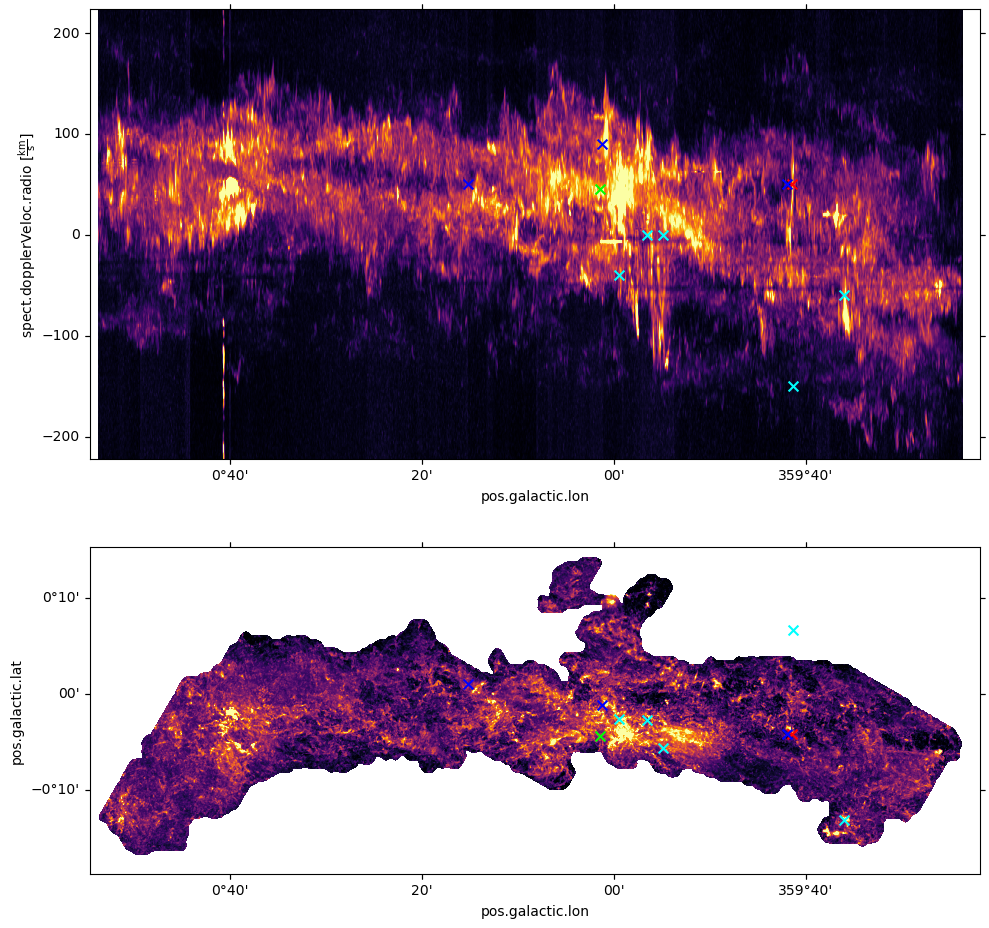

In [23]:
fig = plt.figure(figsize=(10, 10))

ax1 = plt.subplot(211, projection=WCS(whole_pv_CS[0].header))
norm = simple_norm(whole_pv_CS[0].data, stretch='linear', min_percent=1, max_percent=99)
ax1.imshow(whole_pv_CS[0].data, cmap='inferno', aspect='auto', norm=norm)

ax1.scatter(point_3D['coord'].galactic.l-360*u.deg, (point_3D['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='red', s=50)
ax1.scatter(point_3D_IMBH['coord'].galactic.l-360*u.deg, (point_3D_IMBH['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='cyan', s=50)
ax1.scatter(point_3D_IMBH2['coord'].galactic.l-360*u.deg, (point_3D_IMBH2['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='cyan', s=50)
ax1.scatter(point_3D_IMBH3['coord'].galactic.l-360*u.deg, (point_3D_IMBH3['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='cyan', s=50)
ax1.scatter(point_3D_IMBH4['coord'].galactic.l-360*u.deg, (point_3D_IMBH4['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='cyan', s=50)
ax1.scatter(point_3D_IMBH5['coord'].galactic.l-360*u.deg, (point_3D_IMBH5['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='cyan', s=50)
ax1.scatter(point_3D_MUBLO['coord'].galactic.l, (point_3D_MUBLO['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='lime', s=50)
ax1.scatter(point_3D_CCC['coord'].galactic.l-360*u.deg, (point_3D_CCC['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='blue', s=50)
ax1.scatter(point_3D_CCC2['coord'].galactic.l, (point_3D_CCC2['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='blue', s=50)
ax1.scatter(point_3D_CCC3['coord'].galactic.l, (point_3D_CCC3['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='blue', s=50)
#ax1.scatter(point_3D_CCC4['coord'].galactic.l, (point_3D_CCC4['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='blue', s=50)

ax11 = ax1.coords[1]
ax11.set_format_unit(u.km/u.s)


ax2 = plt.subplot(212, projection=WCS(max_CS[0].header), sharex=ax1)
norm = simple_norm(max_CS[0].data, stretch='linear', min_percent=1, max_percent=99)
ax2.imshow(max_CS[0].data, cmap='inferno', norm=norm)

ax2.scatter(point_3D['coord'].galactic.l-360*u.deg, point_3D['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='red', s=50)
ax2.scatter(point_3D_IMBH['coord'].galactic.l-360*u.deg, point_3D_IMBH['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='cyan', s=50)
ax2.scatter(point_3D_IMBH2['coord'].galactic.l-360*u.deg, point_3D_IMBH2['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='cyan', s=50)
ax2.scatter(point_3D_IMBH3['coord'].galactic.l-360*u.deg, point_3D_IMBH3['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='cyan', s=50)
ax2.scatter(point_3D_IMBH4['coord'].galactic.l-360*u.deg, point_3D_IMBH4['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='cyan', s=50)
ax2.scatter(point_3D_IMBH5['coord'].galactic.l-360*u.deg, point_3D_IMBH5['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='cyan', s=50)
ax2.scatter(point_3D_MUBLO['coord'].galactic.l, point_3D_MUBLO['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='lime', s=50)
ax2.scatter(point_3D_CCC['coord'].galactic.l-360*u.deg, point_3D_CCC['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='blue', s=50)
ax2.scatter(point_3D_CCC2['coord'].galactic.l, point_3D_CCC2['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='blue', s=50)
ax2.scatter(point_3D_CCC3['coord'].galactic.l, point_3D_CCC3['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='blue', s=50)
#ax2.scatter(point_3D_CCC4['coord'].galactic.l, point_3D_CCC4['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='blue', s=50)

plt.tight_layout()

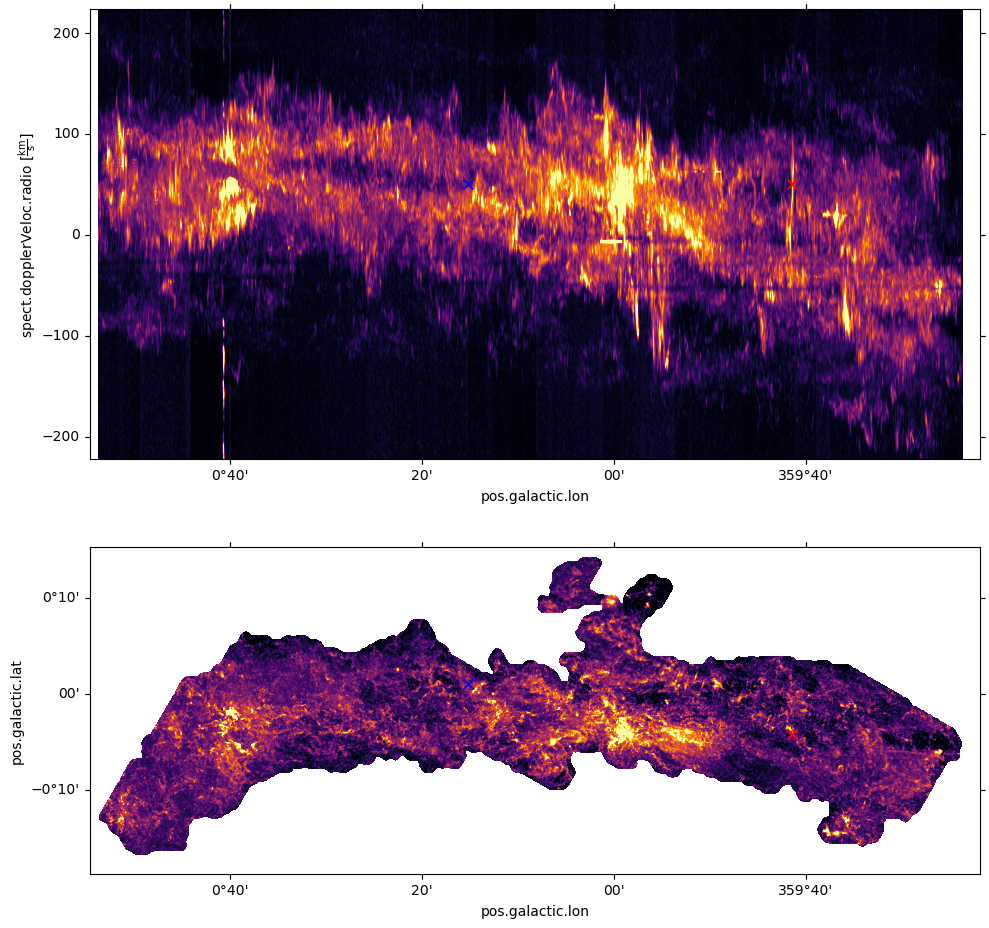

In [16]:
fig = plt.figure(figsize=(10, 10))

ax1 = plt.subplot(211, projection=WCS(whole_pv_CS[0].header))
norm = simple_norm(whole_pv_CS[0].data, stretch='linear', min_percent=1, max_percent=99)
ax1.imshow(whole_pv_CS[0].data, cmap='inferno', aspect='auto', norm=norm)

ax1.scatter(point_3D['coord'].galactic.l-360*u.deg, (point_3D['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='red', s=50)
ax1.scatter(point_3D_CCC2['coord'].galactic.l, (point_3D_CCC2['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='blue', s=50)
#ax1.scatter(point_3D_CCC4['coord'].galactic.l, (point_3D_CCC4['vel']).to(u.m/u.s), transform=ax1.get_transform('world'), marker='x', color='blue', s=50)

ax11 = ax1.coords[1]
ax11.set_format_unit(u.km/u.s)


ax2 = plt.subplot(212, projection=WCS(max_CS[0].header), sharex=ax1)
norm = simple_norm(max_CS[0].data, stretch='linear', min_percent=1, max_percent=99)
ax2.imshow(max_CS[0].data, cmap='inferno', norm=norm)

ax2.scatter(point_3D['coord'].galactic.l-360*u.deg, point_3D['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='red', s=50)
ax2.scatter(point_3D_CCC2['coord'].galactic.l, point_3D_CCC2['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='blue', s=50)
#ax2.scatter(point_3D_CCC4['coord'].galactic.l, point_3D_CCC4['coord'].galactic.b, transform=ax2.get_transform('world'), marker='x', color='blue', s=50)

plt.tight_layout()

# Cutout PV

In [10]:
reg_looky = Regions.read('/orange/adamginsburg/jwst/cloudc/regions_/looky.reg')

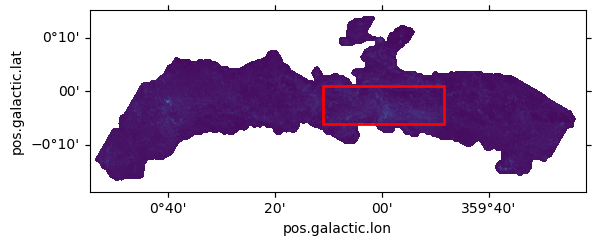

In [12]:
ax = plt.subplot(111, projection=WCS(max_CS[0].header))
ax.imshow(max_CS[0].data)
reg_looky[0].to_pixel(WCS(max_CS[0].header)).plot(ax=ax, edgecolor='red', facecolor='none', zorder=10)

In [23]:
reg = regions.RectangleSkyRegion(SkyCoord(359.99453747, -0.04261009, unit=(u.deg, u.deg), frame='galactic'), width=1364.5539*u.arcsec, height=423.5573*u.arcsec)
subcube = cube_CS.subcube_from_regions(reg_looky)

In [24]:
subcube.write('/orange/adamginsburg/jwst/cloudc/alma/ACES/cubes/CS21_CubeMosaic_looky.fits')


In [ ]:
subcube = SpectralCube.read('/orange/adamginsburg/jwst/cloudc/alma/ACES/cubes/CS21_CubeMosaic_looky.fits')